In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib.pylab import plt

# https://www.batteryarchive.org/cycle_list.html?t=0001

In [68]:
SNL_LFP = os.listdir("./Datasets/SNL/SNL LFP")
SNL_NCA = os.listdir("./Datasets/SNL/SNL NCA")
SNL_NMC = os.listdir("./Datasets//SNL/SNL NMC")

data_LFP1 = pd.read_csv(os.path.join("./Datasets/SNL/SNL LFP/", SNL_LFP[10]))
data_NCA1 = pd.read_csv(os.path.join("./Datasets/SNL/SNL NCA/", SNL_NCA[0]))
data_NMC1 = pd.read_csv(os.path.join("./Datasets/SNL/SNL NMC/", SNL_NMC[0]))


In [141]:
def get_stats(data, fearure, do_print):
    mean = np.mean(data[feature])
    std = np.std(data[feature])
    max =  np.max(data[feature])
    min = np.max(data[feature])
    
    if (do_print):
        print("Mean :",mean)
        print("STD  :", std)
        print("Max  :",max)
        print("Min  :", min)
    upper_limit = mean + 1*std
    lower_limit = mean - 1*std
    return upper_limit, lower_limit
    # , mean, std, max, min

In [142]:
data_LFP1 = data_LFP1.drop_duplicates(subset=['Cycle_Index'])
data_LFP1.head()

,Cycle_Index,Start_Time,End_Time,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh)
0,1.0,2018-02-05 15:13:54.030937,2018-02-05 19:30:52.351535,15428.351,-0.55,0.549,1.997,3.6,1.022,1.032,3.433,3.322
1,2.0,2018-02-05 19:30:52.382522,2018-02-05 23:46:08.453951,30744.453,-0.55,0.549,1.999,3.6,1.032,1.034,3.456,3.329
2,3.0,2018-02-05 23:46:08.516516,2018-02-06 04:01:17.429993,46053.429,-0.55,0.549,1.996,3.6,1.032,1.035,3.457,3.332
3,4.0,2018-02-06 04:01:17.430103,2018-02-06 10:26:41.951304,69177.951,-1.10,0.549,1.994,3.6,2.063,2.064,6.907,6.566
4,5.0,2018-02-06 10:28:42.007075,2018-02-06 13:33:06.501640,80362.501,-1.10,0.549,1.990,3.6,1.031,1.032,3.445,3.284


In [143]:
feature = 'Discharge_Capacity (Ah)'

In [191]:
import re
types = ['LFP', "NCA", "NMC"]

def plot(type_, feature):
    plt.figure(figsize=(20,10))
    data_dir = os.listdir("./Datasets/SNL/SNL "+ types[type_])
    
    files = fnmatch.filter(data_dir, '*cycle_data.csv')
    
    for file in files[0:10]:
        data = pd.read_csv(os.path.join("./Datasets/SNL/SNL "+types[type_]+'/', file))
        upper_limit, lower_limit = get_stats(data, feature, do_print=False)
        # plt.plot(data[feature].loc[(data[feature] <=upper_limit) & (data[feature]>lower_limit)])
        temp_data = pd.DataFrame(data[feature].expanding().mean(),columns = [feature])
        plt.plot(temp_data[feature].loc[(temp_data[feature] <=upper_limit) & (temp_data[feature]>lower_limit)])

    plt.xlabel("Cycles")
    plt.ylabel(feature)



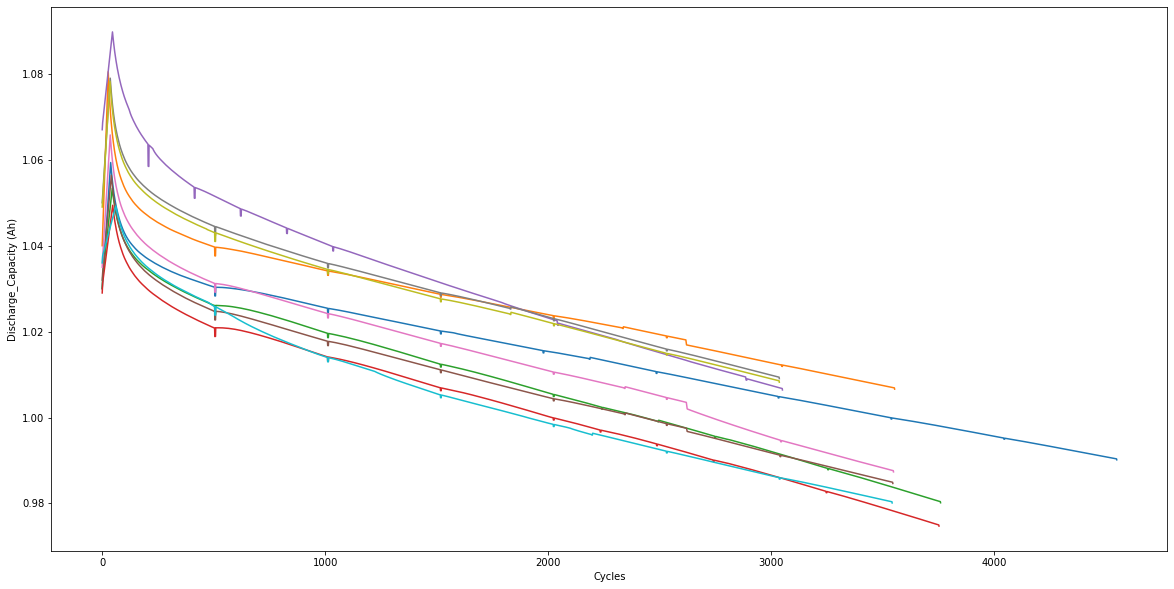

In [192]:
plot(0,feature)

['dataloader.py',
 'FPC_Approach.py',
 'import_file.py',
 'load_data.py',
 'model.py',
 'train_model.py',
 'util_FPC.py']